In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt

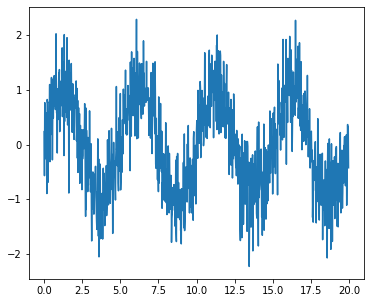

In [2]:
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

##### my way

In [3]:
# The FFT of the signal
sig_fft = fft(sig)
sample_freq = fftfreq(sig.size, d=time_step)
no_of_sample = len(sig)

In [4]:
power = np.abs(sig_fft)**2
sample_freq = fftfreq(no_of_sample, d=time_step)
pos_mask = np.where(sample_freq > 0)
freq = sample_freq[pos_mask]
peak_freq = freq[power[pos_mask].argmax()]

In [5]:
peak_freq

0.2

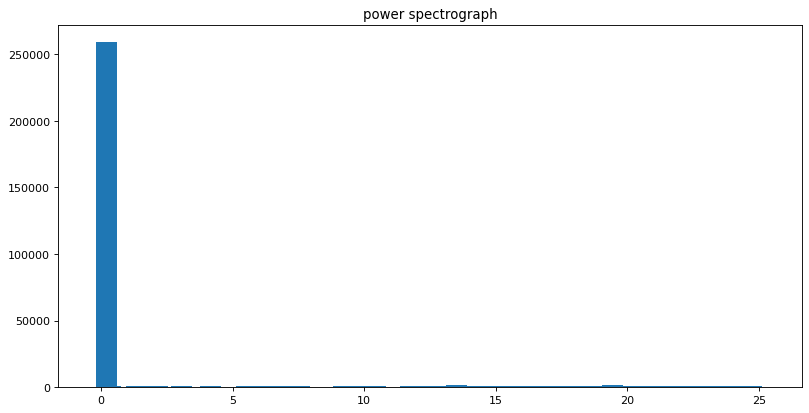

In [6]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(freq, power[pos_mask])
plt.title("power spectrograph")
plt.show();

In [7]:
POWER_TH = 50000

In [8]:
sig_fft_clean = sig_fft.copy()
sig_fft_clean[power>=POWER_TH]=0
sig_fft_clean = ifft(sig_fft_clean)
sig_fft_clean_prm = sig_fft.copy()
sig_fft_clean_prm[power<POWER_TH]=0
sig_fft_clean_prm = ifft(sig_fft_clean_prm)

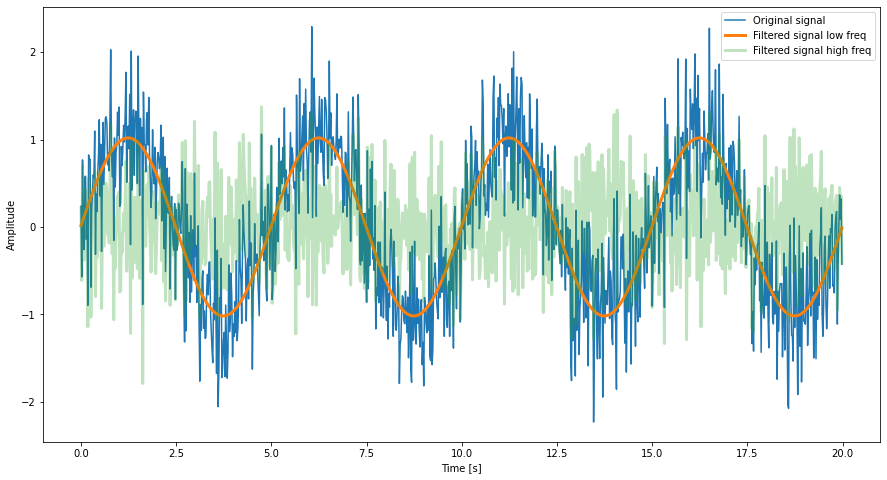

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, np.real(sig_fft_clean_prm), linewidth=3, label='Filtered signal low freq')
plt.plot(time_vec, np.real(sig_fft_clean), linewidth=3, label='Filtered signal high freq', alpha=0.3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

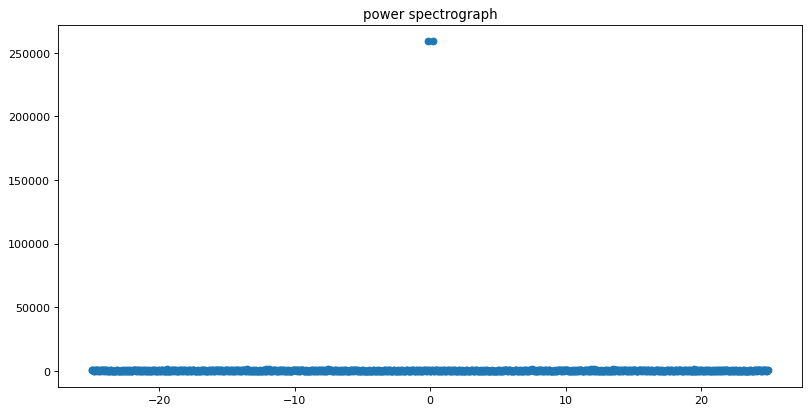

In [10]:
power = np.abs(sig_fft)**2
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(sample_freq, power)
plt.title("power spectrograph")
plt.show();

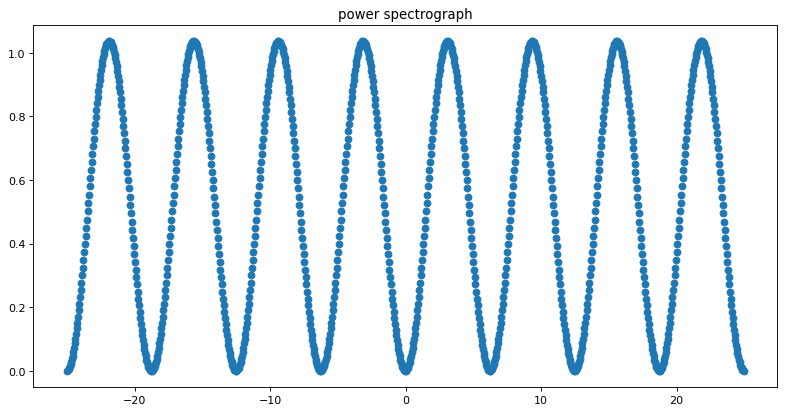

In [11]:
power = np.abs(sig_fft_clean_prm)**2
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(sample_freq, power)
plt.title("power spectrograph")
plt.show();

In [12]:
sig_fft_clean_prm = sig_fft.copy()
sig_fft_clean_prm[np.abs(sample_freq) > peak_freq]=0
#sig_fft_clean_prm[power<POWER_TH]=0
sig_fft_clean_prm = ifft(sig_fft_clean_prm)

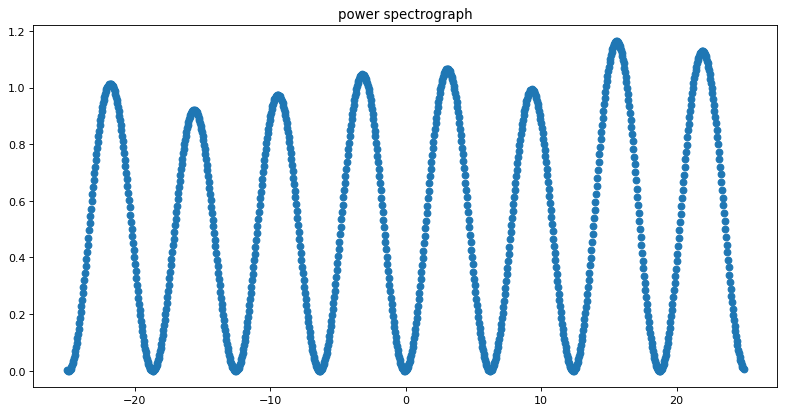

In [13]:
power = np.abs(sig_fft_clean_prm)**2
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(sample_freq, power)
plt.title("power spectrograph")
plt.show();

#### scipy way

In [14]:
from scipy import fftpack

[]

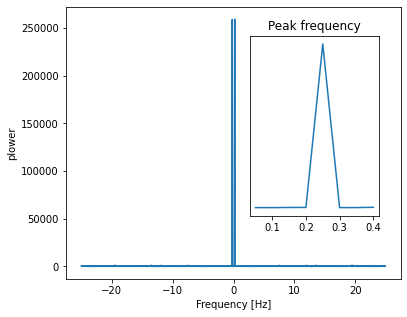

In [15]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

C:\Users\smrut\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


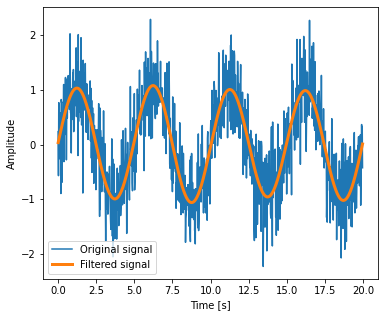

In [16]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')